In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
data = pd.read_csv("train.csv")

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
data["Age"].mean()

29.69911764705882

In [11]:
data["Age"].fillna(30,inplace = True)

In [12]:
data["Age"].isnull().sum()

0

In [13]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
data = data.drop(["Name", "Ticket", "Fare", "PassengerId", "Cabin"], axis = 1)

In [15]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [16]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

In [17]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [19]:
data["Embarked"].fillna('S', inplace = True)

In [31]:
from sklearn import preprocessing
for x in data.columns:
    if data[x].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(data[x].values))
        data[x] = lbl.transform(list(data[x].values))

In [32]:
x, y = data.drop(["Survived",], axis=1), data["Survived"]

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 1)

In [34]:
neig = np.arange(1,25)
pred = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

for i,k in enumerate(neig):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train,y_train)
    prediction = knn.predict(x_test)
    pred.append(metrics.accuracy_score(prediction,y_test))

In [36]:
max(pred)

0.7425373134328358

In [37]:
pred.index(max(pred))

2

([<matplotlib.axis.XTick at 0x20552ef2400>,
 <a list of 24 Text xticklabel objects>)

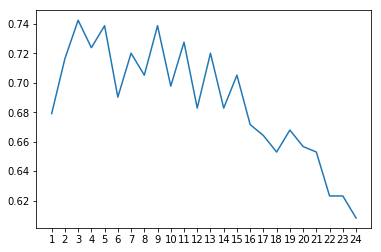

In [38]:
plt.plot(neig, pred)
plt.xticks(neig)